In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path = "../output_video/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

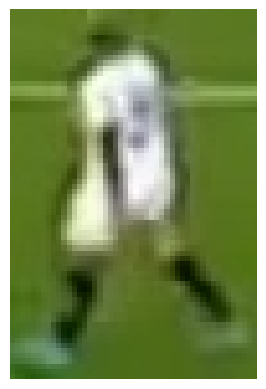

In [7]:
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

# Take the top half of the image

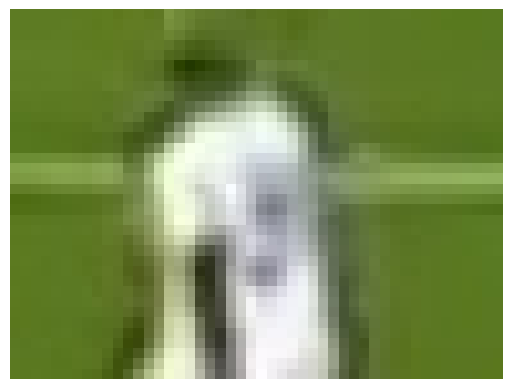

In [8]:
top_half_image = image[0:image.shape[0]//2, :]
plt.imshow(top_half_image)
plt.axis('off')  # Turn off axis labels 
plt.show()

# Cluster the image into 2 clusters

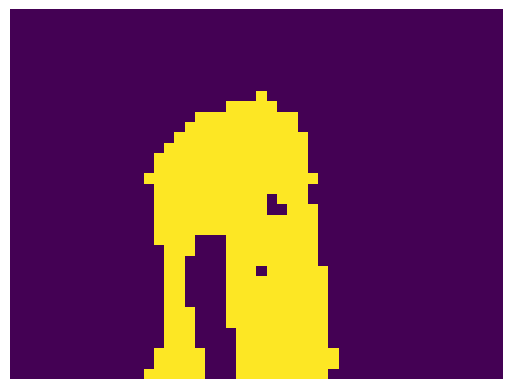

In [31]:
# Reshape the image into a 2D array of pixels
pixels = top_half_image.reshape(-1, 3)

#Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pixels)

labels = kmeans.labels_

# Reshape the labels into the original shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display clustered image
plt.imshow(clustered_image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [32]:
corner_clusters = [clustered_image[0,0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
player_cluster = 1-non_player_cluster

In [38]:
print(non_player_cluster)
print(player_cluster)
print(kmeans.cluster_centers_[player_cluster])
print(kmeans.cluster_centers_[non_player_cluster])

0
1
[202.74858757 208.33615819 196.94350282]
[ 94.42576419 118.95924309  45.26055313]
